# 🤖 Notebook 3: Modelo 1 - Regresión Logística

**Objetivo:** Construir el PRIMER modelo usando **Regresión Logística**

**Pregunta 5 - Modelo 1:** Modelo de regresión para predecir niveles de ingreso e interpretar coeficientes


## 1. Cargar Datos Preprocesados


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings

warnings.filterwarnings("ignore")

X_train = pd.read_csv("../resultados/X_train.csv")
y_train = pd.read_csv("../resultados/y_train.csv").values.ravel()

print(f"✅ Datos cargados:")
print(f"   X_train: {X_train.shape}")
print(f"   y_train: {y_train.shape}")

✅ Datos cargados:
   X_train: (22792, 29)
   y_train: (22792,)


## 2. Entrenar Modelo de Regresión Logística


In [7]:
modelo_logistica = LogisticRegression(
    max_iter=1000, random_state=42, class_weight="balanced", solver="lbfgs"
)

if X_train.isnull().sum().sum() > 0:
    X_train = X_train.fillna(0)

print("🚀 Entrenando Modelito 1: Regresión Logística...")
modelo_logistica.fit(X_train, y_train)
print("✅ Modelo entrenado exitosamente")

🚀 Entrenando Modelito 1: Regresión Logística...
✅ Modelo entrenado exitosamente


## 3. Evaluación Inicial en Train


In [8]:
y_train_pred = modelo_logistica.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f"📊 Accuracy en TRAIN: {accuracy_train*100:.2f}%")
print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_train_pred, target_names=["<=50K", ">50K"]))

📊 Accuracy en TRAIN: 79.95%

Reporte de Clasificación (Train):
              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86     17303
        >50K       0.56      0.84      0.67      5489

    accuracy                           0.80     22792
   macro avg       0.75      0.81      0.76     22792
weighted avg       0.85      0.80      0.81     22792



## 4. Interpretación de Coeficientes


In [9]:
coeficientes = pd.DataFrame(
    {"Variable": X_train.columns, "Coeficiente": modelo_logistica.coef_[0]}
)
coeficientes["Abs_Coef"] = abs(coeficientes["Coeficiente"])
coeficientes = coeficientes.sort_values("Abs_Coef", ascending=False)

print("=" * 80)
print("COEFICIENTES DEL MODELO - REGRESIÓN LOGÍSTICA")
print("=" * 80)
print("\n📊 Top 15 Variables Más Influyentes:")
print(coeficientes.head(15)[["Variable", "Coeficiente"]])

print("\n✅ Interpretación:")
print("   - Coeficiente POSITIVO → Aumenta probabilidad de ingreso >50K")
print("   - Coeficiente NEGATIVO → Disminuye probabilidad de ingreso >50K")
print("   - Mayor |coeficiente| → Mayor influencia")

COEFICIENTES DEL MODELO - REGRESIÓN LOGÍSTICA

📊 Top 15 Variables Más Influyentes:
              Variable  Coeficiente
1            CAPGANADO     2.365527
25   ECIV_Casado-civil     0.790158
24  ECIV_ Nunca-casado    -0.551168
19      EDU_ Preschool    -0.546324
4         EDUCACIONNUM     0.484892
3           HORASEMANA     0.457020
0                 EDAD     0.409412
2              CAPPERD     0.261473
26     ECIV_Divorciado    -0.222608
15      EDU_ Bachelors     0.217859
18        EDU_ Masters     0.176599
27       ECIV_Separado    -0.167277
20    EDU_ Prof-school     0.163221
7            EDU_ 11th    -0.142417
16      EDU_ Doctorate     0.134799

✅ Interpretación:
   - Coeficiente POSITIVO → Aumenta probabilidad de ingreso >50K
   - Coeficiente NEGATIVO → Disminuye probabilidad de ingreso >50K
   - Mayor |coeficiente| → Mayor influencia


## 5. Visualización de Coeficientes


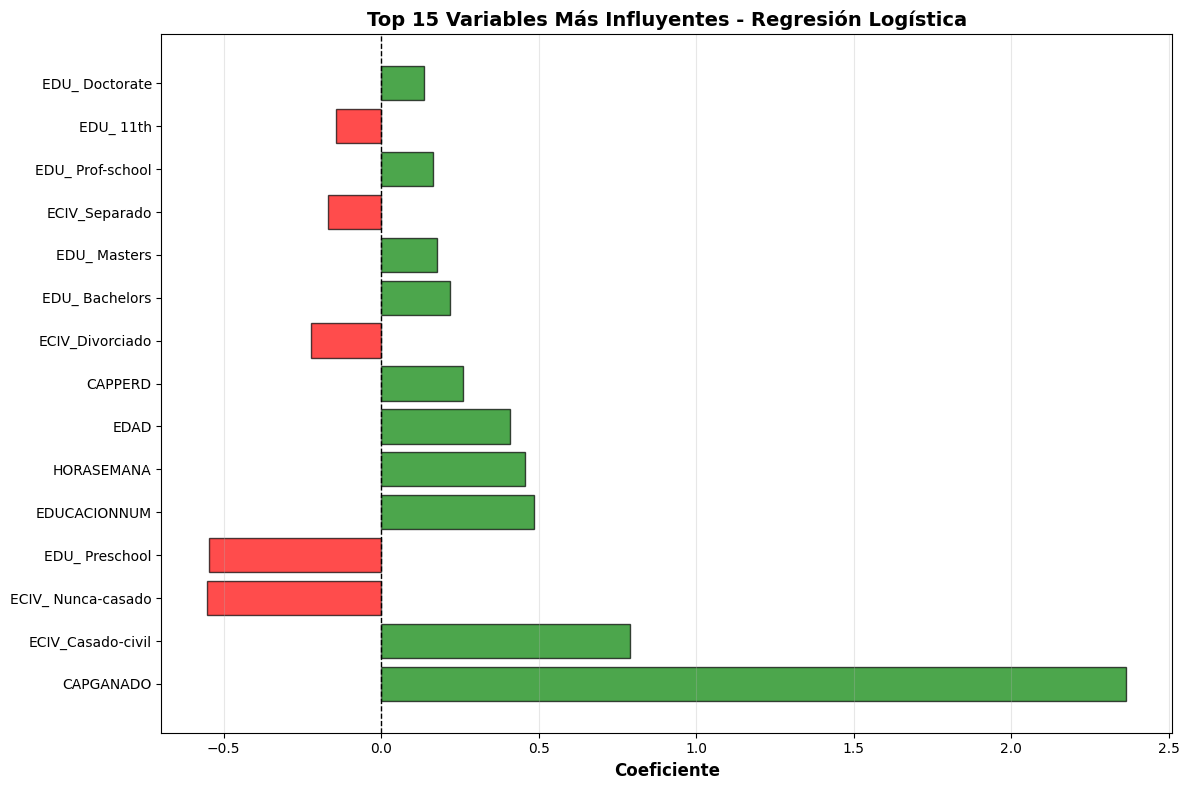

✅ Gráfico guardado: resultados/coeficientes_logistica.png


In [10]:
top_15 = coeficientes.head(15)

plt.figure(figsize=(12, 8))
colors = ["green" if x > 0 else "red" for x in top_15["Coeficiente"]]
plt.barh(
    range(len(top_15)),
    top_15["Coeficiente"],
    color=colors,
    alpha=0.7,
    edgecolor="black",
)
plt.yticks(range(len(top_15)), top_15["Variable"])
plt.xlabel("Coeficiente", fontsize=12, fontweight="bold")
plt.title(
    "Top 15 Variables Más Influyentes - Regresión Logística",
    fontsize=14,
    fontweight="bold",
)
plt.axvline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.3, axis="x")
plt.tight_layout()
plt.savefig("../resultados/coeficientes_logistica.png", dpi=300, bbox_inches="tight")
plt.show()
print("✅ Gráfico guardado: resultados/coeficientes_logistica.png")

## 6. Guardar Modelo


In [12]:
joblib.dump(modelo_logistica, "../resultados/modelo_logistica.pkl")
print("=" * 80)
print("✅ MODELO 1 COMPLETADO")
print("=" * 80)
print(f"   Accuracy en Train: {accuracy_train*100:.2f}%")
print(f"   Modelo guardado: resultados/modelo_logistica.pkl")
print("\n➡️ Siguiente paso: Notebook 04 - Modelo 2 (Regresión Lineal)")

✅ MODELO 1 COMPLETADO
   Accuracy en Train: 79.95%
   Modelo guardado: resultados/modelo_logistica.pkl

➡️ Siguiente paso: Notebook 04 - Modelo 2 (Regresión Lineal)
